# scipy.optimize.linprog

- https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

$
min_{x_0, x_1} f(x_0, x_1)
\\
f(x_0, x_1) = - 1 x_0 + 4 x_1
$

s.t.

$
-3 x_0 + 1 x_1 \le 6
\\
1 x_0 + 2 x_1 \le 4
\\
x_1 \ge -3
$


In [138]:
from scipy.optimize import linprog

c= [ -1, 4]
A= [[-3, 1], 
    [ 1, 2]]

b= [6, 4]

x0_bounds= (None, None)
x1_bounds= (-3, None)

res= linprog(
        c, 
        A_ub= A, 
        b_ub= b, 
        bounds= [x0_bounds, 
                 x1_bounds])

res

     con: array([], dtype=float64)
     fun: -21.999999840824938
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.89999997e+01, 8.46872492e-08])
  status: 0
 success: True
       x: array([ 9.99999989, -2.99999999])

In [139]:
c @ res.x

In [140]:
(A @ res.x <= b).all()

True

In [141]:
res.x[1] >= x1_bounds[0] 

True

In [142]:
from ryPat import *

- https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html

In [143]:
x, y= sm.symbols('x,y')

def Rosenbrock(x, y, b=100):
    z= (x-1)**2 + b*(y-x**2)**2
    return z

Rosenbrock(x, y)

In [144]:
%matplotlib qt

q= sm.plotting.plot3d(
    Rosenbrock(x, y), 
    (x,-3,3),
    (y,-3,3),
    xlabel= 'x',
    ylabel= 'y',
    show= False)
q.show()

In [145]:
Rosenbrock(x,y).diff(x)

In [146]:
Rosenbrock(x,y).diff(y)

In [147]:
xx, yy= np.mgrid[-3:3.1:.1, -3:3.1:.1]
zz= Rosenbrock(xx,yy, b=20)
zz

array([[2896.   , 2848.2  , 2800.8  , ...,  784.8  ,  760.2  ,  736.   ],
       [2618.972, 2573.532, 2528.492, ...,  644.652,  622.412,  600.572],
       [2364.552, 2321.392, 2278.632, ...,  522.472,  502.512,  482.952],
       ...,
       [2353.352, 2310.192, 2267.432, ...,  511.272,  491.312,  471.752],
       [2607.372, 2561.932, 2516.892, ...,  633.052,  610.812,  588.972],
       [2884.   , 2836.2  , 2788.8  , ...,  772.8  ,  748.2  ,  724.   ]])

In [148]:
from   mpl_toolkits import mplot3d

ax= pl.axes(projection='3d')
ax.contour3D(xx, yy, zz, 100,
            cmap= 'rainbow')

In [149]:
import scipy
#scipy.optimize.rosen?

In [150]:
from ryPat import *

def f0(s):
    x, y= s
    z=  2**(-(x**2+y**2))
    z+= 2**(-((x-2)**2+(y-2)**2)) *2
    z+= 2**(-((x-5)**2+(y+5)**2)) *5
    
    z= -z
    return z

def f1(s):
    x, y= s
    z=  (x**2-y**2)
    z+= -((x-2)+(y-2)**2) 
    z+= ((x-5)**2-(y+5)) 
    
    z= z
    return z

def f2(s):
    
    x, y= s
    
    z=  (x-1)**2 + x*y - (y+1)**2
    
    #z= 2**(-z)
    
    return z

In [151]:
def f(s):
    x, y= s
    z=  x * 2**(-(x**2+y**2))
    return z

x, y= sm.symbols('x,y')
s=    [x,y]

#ryGradient_demo(f(s))
ryPlotGradientMap(f(s))

In [152]:
f(s)

In [153]:

# http://apmonitor.com/che263/index.php/Main/PythonOptimization
import numpy as np
from scipy.optimize import minimize

def constraint1(t):
    x, y= t
    z= 1*x -5
    return z
def constraint2(t):
    x, y= t
    z= 1*y -5
    return z

cons= [{'fun':  constraint1, 'type': 'ineq'},
       {'fun':  constraint2, 'type': 'ineq'}]

bnds= [[-10, 10],
       [-10, 10]
      ]

x0= [0, 0]

solution= minimize(
    f,
    x0,
    #method= 'SLSQP',
    #bounds= bnds,
    #constraints= cons
)

solution


      fun: -0.5151397118370136
 hess_inv: array([[7.00666361e-01, 2.61018560e-09],
       [2.61018560e-09, 1.00000000e+00]])
      jac: array([-7.4505806e-09,  0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-8.49321806e-01, -3.16397028e-09])

In [154]:
f(s)

In [155]:
# ...
def f(s):
    x, y= s
    z= (x+y) * 2**(-(x**2+y**2))
    return z
f(s)

In [156]:

# http://apmonitor.com/che263/index.php/Main/PythonOptimization

import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))


Initial Objective: 16.0
Final Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


# Understanding optimization and it's different types


In [157]:
def f(x):
    y= (x+9) * (x+5) * (x-2) * (x-8)
    return y
x= sm.symbols('x')

f(x)

In [158]:
f(x).expand()

In [159]:
f(x).diff(x).expand()

In [160]:
f(x).diff(x,2).expand()

In [161]:
q= sm.plotting.plot(f(x).expand(),(x,-10,10))
q1= sm.plotting.plot(f(x).diff(x).expand(),(x,-10,10))
q2= sm.plotting.plot(f(x).diff(x,2).expand(),(x,-10,10))

In [162]:
q[0].line_color= 'r'
q1[0].line_color='g'
q2[0].line_color='b'
q.append(q1[0])
q.append(q2[0])
q.legend=True
q.show()

In [163]:
sol= sm.solve(f(x).diff(x), x)
sol
[s.evalf() for s in sol]

In [164]:
import scipy.optimize as sopt
opt= sopt.minimize(f, x0= 0)
opt

      fun: -1338.5602025692726
 hess_inv: array([[0.00271896]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 16
   status: 0
  success: True
        x: array([5.68898297])

In [165]:
opt= sopt.minimize(f, x0= -3)
opt

      fun: -556.5436415499177
 hess_inv: array([[0.00321063]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([-7.33499816])

In [166]:
[(x0, 
  sopt.minimize(f, x0= x0).x) 
 for x0 in np.arange(-3,3,.1)]

[(-3.0, array([-7.33499816])),
 (-2.9, array([-7.33499814])),
 (-2.8, array([-7.33499814])),
 (-2.6999999999999997, array([-7.33499815])),
 (-2.5999999999999996, array([-7.33499812])),
 (-2.4999999999999996, array([-7.33499818])),
 (-2.3999999999999995, array([-7.33499815])),
 (-2.2999999999999994, array([-7.33499813])),
 (-2.1999999999999993, array([-7.33499816])),
 (-2.099999999999999, array([-7.33499815])),
 (-1.9999999999999991, array([-7.33499814])),
 (-1.899999999999999, array([-7.33499814])),
 (-1.799999999999999, array([-7.33499814])),
 (-1.6999999999999988, array([-7.33499813])),
 (-1.5999999999999988, array([-7.33499815])),
 (-1.4999999999999987, array([-7.33499814])),
 (-1.3999999999999986, array([-7.33499811])),
 (-1.2999999999999985, array([5.68898297])),
 (-1.1999999999999984, array([5.68898293])),
 (-1.0999999999999983, array([5.68898298])),
 (-0.9999999999999982, array([5.68898294])),
 (-0.8999999999999981, array([5.68898297])),
 (-0.799999999999998, array([5.68898299])

# Constrained optimization


In [167]:
opt= sopt.minimize(
    f, 
    x0= [0],                    # initial guess
    bounds=      [(-10, 10)],   # -10 <= x <=10
    constraints= [{'type': 'ineq', 
                   'fun': lambda x: x+7  # x+7 >=0
                  },
                  {'type': 'ineq', 
                   'fun': lambda x: -(x-1)  # -(x-1) >=0
                  }]
)
opt

     fun: array([420.00000112])
     jac: array([-368.])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 6
    njev: 2
  status: 0
 success: True
       x: array([1.])

In [168]:
def f(s):
    x, y= s
    z=  x * 2**(-(x**2+y**2))
    return z

x, y= sm.symbols('x,y')
s=    [x,y]
f(s)

#ryGradient_demo(f(s))
ryPlotGradientMap(f(s))

In [169]:
opt= sopt.minimize(
    f, 
    x0= [0, 0],                    # initial guess
    bounds=      [(-10, 10), (-10,10)],   # -10 <= x <=10, -10 <= y <=10, 
    constraints= [{'type': 'ineq', 
                   'fun': lambda s: s[0]+s[1]+1  # x+y+1 >=0
                  },
                  {'type': 'ineq', 
                   'fun': lambda s: s[0]-s[1]+2  # x-y+2 >=0
                  }]
)
opt

     fun: -0.5151397117896506
     jac: array([-1.16154552e-05,  0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-8.49329944e-01, -3.16400060e-09])

In [170]:
f([x,y])

In [171]:
sol= sm.solve([f([x,y]).diff(x), 
               f([x,y]).diff(y)], 
              (x,y))
solL= [(x.evalf(), y.evalf()) for (x,y) in sol]
solL # [(−0.849321800288019, 0), (0.849321800288019, 0)]

# 檢查2次微分，判斷在極點為極小值或極大值
# 2次微分 若為正，該點有極小值

f([x,y]).diff(x,2).subs(
    {x:solL[0][0],
     y:solL[0][1]}).evalf() 
# 1.42827055541715

# 2次微分 若為負，該點有極大值

f([x,y]).diff(x,2).subs(
    {x:solL[1][0],
     y:solL[1][1]}).evalf()
# −1.42827055541715

In [172]:
opt= sopt.minimize(
    f, 
    x0= [0, 0],                    # initial guess
    bounds=      [(-10, 10), (-10,10)],   # -10 <= x <=10, -10 <= y <=10, 
)
opt

      fun: -0.5151397118370137
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.11022302e-08, 0.00000000e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-8.49321795e-01, -3.92669050e-09])

In [173]:
opt= sopt.minimize(
    f, 
    x0= [0, 0],                    # initial guess
    bounds=      [(-10, 10), (-10,10)],   # -10 <= x <=10, -10 <= y <=10, 
    
    constraints= [{'type': 'ineq', 
                   'fun': lambda s: (s[0]+s[1]-2)  # x+y-2 >=0
                  },
                  {'type': 'ineq', 
                   'fun': lambda s: -(s[0]-s[1]+1)  # x-y+1 <=0
                  }]
)
opt

     fun: 6.638126077537978e-07
     jac: array([-2.72412790e-06, -7.94961677e-06])
 message: 'Optimization terminated successfully'
    nfev: 43
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([1.87036512, 4.23412032])

In [174]:
# Linear Optimization
import scipy.optimize as sopt
from ryPat import *

def f(s):
    x, y= s
    z= -1*x + 4*y
    return z

def c1(s):
    x,y= s
    z= -(-3*x + 1*y -6)
    return z

def c2(s):
    x,y= s
    z= -1*x -2*y +4
    return z

def c3(s):
    x,y= s
    z= 1*y + 3
    return z

opt= sopt.minimize(
    f,
    x0= [0,0],
    constraints= [
        {'fun':c1, 'type': 'ineq'},
        {'fun':c2, 'type': 'ineq'},
        #{'fun':c3, 'type': 'ineq'}        
        ],
    bounds= [(None, None),
             (-3, None)]
)

opt

     fun: -22.0000000000011
     jac: array([-1.,  4.])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([10., -3.])

In [175]:
f([x,y])

In [176]:
%matplotlib qt
ryPlotGradientMap(f([x,y]), (-10,10), (-10,10))

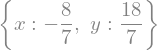

In [177]:
sm.solve(
    [c1([x,y]),
     c2([x,y])],
       (x,y))

In [178]:
c1([x,y])

In [179]:
c2([x,y])

In [180]:
c3([x,y])

In [181]:
q1= sm.plotting.plot_parametric(x, 3*x+6,    (x,-10,10))
q2= sm.plotting.plot_parametric(x, (-x+4)/2, (x,-10,10))
q3= sm.plotting.plot_parametric(x, -3, (x,-10,10))

q1[0].line_color='r'
q2[0].line_color='g'
q3[0].line_color='b'
q1.append(q2[0])
q1.append(q3[0])
q1.legend=True
q1.xlabel='x'
q1.ylabel='y'
q1.title='Constraints'
q1.show()

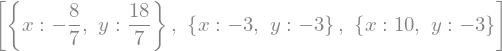

In [182]:
vtx0= sm.solve(
    [c1([x,y]),
     c2([x,y])],
       (x,y))
vtx1= sm.solve(
    [c1([x,y]),
     c3([x,y])],
       (x,y))
vtx2= sm.solve(
    [c2([x,y]),
     c3([x,y])],
       (x,y))
[vtx0,vtx1,vtx2]

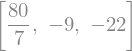

In [183]:
v0= f([x,y]).subs(vtx0)
v1= f([x,y]).subs(vtx1)
v2= f([x,y]).subs(vtx2)
[v0,v1,v2]

In [184]:
np.argmin([v0,v1,v2])

2

In [185]:
[vtx0,vtx1,vtx2][np.argmin([v0,v1,v2])]

In [186]:
#
# Linear Optimization 專屬演算法 .linprog()
#

c= [ -1, 4]

A= [[-3, 1], 
    [ 1, 2]]
b= [6, 4]

x_bounds= (None, None)
y_bounds= (-3, None)

opt= sopt.linprog(
        c, 
        A_ub= A, 
        b_ub= b, 
        bounds= [x_bounds, 
                 y_bounds])
opt


     con: array([], dtype=float64)
     fun: -21.999999840824938
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.89999997e+01, 8.46872492e-08])
  status: 0
 success: True
       x: array([ 9.99999989, -2.99999999])

In [187]:
def ryPlotGradientMap(z,
                      xrange=(-3,+3), 
                      yrange=(-3,+3),
                      downSampleFactor= 4, 
                      lengthFactor= .1):
    
    fg, ax, zm, xrange, yrange=  ryPlot3d(z, 
                                          xrange= xrange, 
                                          yrange=yrange)
    
    z10= z.diff(x,1,y,0)
    z01= z.diff(x,0,y,1)

    #downSampleFactor= 2
    xm, ym, zm0= np.meshgrid(
        xrange[::downSampleFactor],
        yrange[::downSampleFactor],
        np.linspace(np.min(zm), np.min(zm)+1, 1)
        )

    #dz_dx= 2*x0
    #dz_dy= 2*y0

    dz_dx_m= sm.lambdify((x,y),z10)(xm,ym)
    dz_dy_m= sm.lambdify((x,y),z01)(xm,ym)

    u= dz_dx_m
    v= dz_dy_m
    w= np.zeros_like(xm)
    ax.quiver(xm, ym, zm0, 
              u, v, w, 
              length= lengthFactor, #*np.max([u,v]), 
              color = 'gray') 
    
    return fg, ax


In [105]:
# 
# NonLinear Optimization
# Wonderful!!
#

from ryPat import *
import scipy.optimize as sopt

def f(s):
    x, y= s
    
    #z= (x-1)**2 + (y+1)**2
    z= (x-5)**2 + (y-5)**2
    z= - 2**(-z/25)
    
    return z

def c1(s):
    x,y= s
    z= -(-3*x + 1*y -6)
    return z

def c2(s):
    x,y= s
    z= -1*x -2*y +4
    return z

def c3(s):
    x,y= s
    z= 1*y + 3
    return z

#
# Objective function s.t. Constraints
#
x,y= sm.symbols('x,y')

print(f'Objective function: f()={f([x,y])}')
q= f([x,y])
display(q)

print('Constraints: c() >= 0')
print(f'c()= {c1([x,y])},{c2([x,y])},{c3([x,y])}')

q= c1([x,y])
display(q)
q= c2([x,y])
display(q)
q= c3([x,y])
display(q)

opt= sopt.minimize(
    f,
    x0= [0,0],
    constraints= [
        {'fun':c1, 'type': 'ineq'},
        {'fun':c2, 'type': 'ineq'},
        #{'fun':c3, 'type': 'ineq'}        
        ],
    bounds= [(None, None),
             (-3, None)
             #(None, -3)
            ]
)
print(f'optimum= \n{opt}')


#
# plot objective function
#
x,y= sm.symbols('x,y')
#f([x,y])
fg, ax= ryPlotGradientMap(
    f([x,y]), 
    xrange= (-10,10), 
    yrange= (-10,10)
)

#
# plot constraints 
#

xx= np.linspace(-10,10,1001)

yy1= 3*xx+6
yy2= (-xx+4)/2
yy3= xx*0 -3

ax.plot(xx,yy1,'r',
        xx,yy2,'g',
        xx,yy3,'b',
        linestyle='--'
       )
#
# 畫 最佳點 opt.x 
#

ax.scatter3D(
    xs= [opt.x[0]]*2, 
    ys= [opt.x[1]]*2, 
    zs= [0, opt.fun],
    color= 'magenta',
    marker= 's'    
)


ax.plot3D(
    xs= [opt.x[0]]*2, 
    ys= [opt.x[1]]*2, 
    zs= [0, opt.fun],
    color= 'magenta',
    #marker= '.',
    linestyle= ':'
)



#
# 畫坐標軸 (x軸,y軸) 
#
ax.plot(xx,  xx*0,'k--',
        xx*0,xx,  'k--',
       )

#
# 設定 2軸 顯示範圍
#
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])


#
# 再加碼 ，把 constraints 升至 立體的曲面 
#

xx= np.linspace(-10,10,1001)

yy1= 3*xx+6
yy2= (-xx+4)/2
yy3= xx*0 -3

zz1= f([xx,yy1])
zz2= f([xx,yy2])
zz3= f([xx,yy3])

ax.plot3D(xx,yy1,zz1, color='r', linestyle='-')
ax.plot3D(xx,yy2,zz2, color='g', linestyle='-')
ax.plot3D(xx,yy3,zz3, color='b', linestyle='-')

pl.show()


Objective function: f()=-2**(-(x - 5)**2/25 - (y - 5)**2/25)


Constraints: c() >= 0
c()= 3*x - y + 6,-x - 2*y + 4,y + 3


optimum= 
     fun: -0.5112142652520548
     jac: array([-0.06236658, -0.12472928])
 message: 'Optimization terminated successfully'
    nfev: 27
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([2.79994536, 0.60002732])


In [104]:
f([x,y])

In [57]:
ax.plot(xx,xx*0,'m--',
        xx*0,xx,'m--',
        #xx,yy3,'b',
        #opt.x[0:1], opt.x[1:],'m'
       )
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

In [59]:
ax.scatter(xs= opt.x[0:1], ys=opt.x[1:])

In [10]:
#%matplotlib qt

In [62]:
ax.scatter3D(xs= opt.x[0:1], ys=opt.x[1:], zs=opt.fun)

In [61]:
opt.fun

In [64]:
ax.scatter3D(
    xs= [opt.x[0]]*2, 
    ys= [opt.x[1]]*2, 
    zs= [0, opt.fun])